# Lab Cleaning Numercal Data


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

import numpy as np
pd.set_option('display.max_columns', 25)


In [2]:
customer_df = pd.read_csv('customer_value_analysis.csv')

In [3]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
customer_df.shape

(9134, 24)

In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [6]:
customer_df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [7]:
customer_df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [8]:
customer_df.columns = customer_df.columns.str.replace(' ', '_')
customer_df.columns = customer_df.columns.str.lower()    #Changing the columns to lowercase
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [9]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])

In [10]:
customer_df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [11]:
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [12]:
# Define the function
def get_numerical_and_categorical_columns(df):
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
    numerical_df = df[numerical_columns]
    categorical_df = df[categorical_columns]
    return numerical_df, categorical_df

# Call the function with your updated dataframe
numerical_df, categorical_df = get_numerical_and_categorical_columns(customer_df)

# Print the numerical columns dataframe
print("Numerical columns:")
print(numerical_df.head())

# Print the categorical columns dataframe
print("Categorical columns:")
print(categorical_df.head())


Numerical columns:
   customer_lifetime_value  income  monthly_premium_auto  \
0              2763.519279   56274                    69   
1              6979.535903       0                    94   
2             12887.431650   48767                   108   
3              7645.861827       0                   106   
4              2813.692575   43836                    73   

   months_since_last_claim  months_since_policy_inception  \
0                       32                              5   
1                       13                             42   
2                       18                             38   
3                       18                             65   
4                       12                             44   

   number_of_open_complaints  number_of_policies  total_claim_amount  
0                          0                   1          384.811147  
1                          0                   8         1131.464935  
2                          0            

In [13]:
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [14]:
customer_df = customer_df.drop('customer', axis=1)

In [15]:
customer_df

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [16]:
numerical = customer_df.select_dtypes(include=['int', 'float'])


In [17]:
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [18]:
corr_matrix = numerical.corr()


<Axes: >

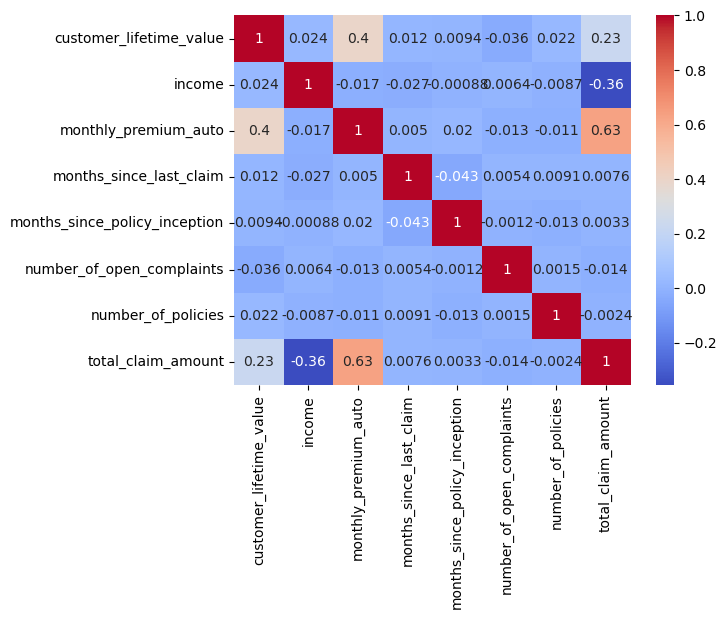

In [19]:
import seaborn as sns
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')


The pair of numerical variables that have the highest correlation are montly_premium_auto and income and it makes sense because the higher the income, the higher chances of monthly_premium_auto

In [20]:
def get_numerical_continuous_discrete(df, threshold=36):
    """
    Given a pandas DataFrame, returns two pandas DataFrames:
    the first containing numerical continuous columns and
    the second containing numerical discrete columns.
    The threshold argument sets the maximum number of unique
    values for a numerical column to be classified as discrete.
    """
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    continuous_cols = []
    discrete_cols = []
    for col in numerical_cols:
        if df[col].nunique() > threshold:
            continuous_cols.append(col)
        else:
            discrete_cols.append(col)
    continuous_df = df[continuous_cols]
    discrete_df = df[discrete_cols]
    return continuous_df, discrete_df


In [21]:
continuous_df, discrete_df = get_numerical_continuous_discrete(customer_df)


In [22]:
continuous_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,5,384.811147
1,6979.535903,0,94,42,1131.464935
2,12887.431650,48767,108,38,566.472247
3,7645.861827,0,106,65,529.881344
4,2813.692575,43836,73,44,138.130879
...,...,...,...,...,...
9129,23405.987980,71941,73,89,198.234764
9130,3096.511217,21604,79,28,379.200000
9131,8163.890428,0,85,37,790.784983
9132,7524.442436,21941,96,3,691.200000


In [23]:
discrete_df

,months_since_last_claim,number_of_open_complaints,number_of_policies
0,32,0,1
1,13,0,8
2,18,0,2
3,18,0,7
4,12,0,1
...,...,...,...
9129,18,0,2
9130,14,0,1
9131,9,3,2
9132,34,0,3


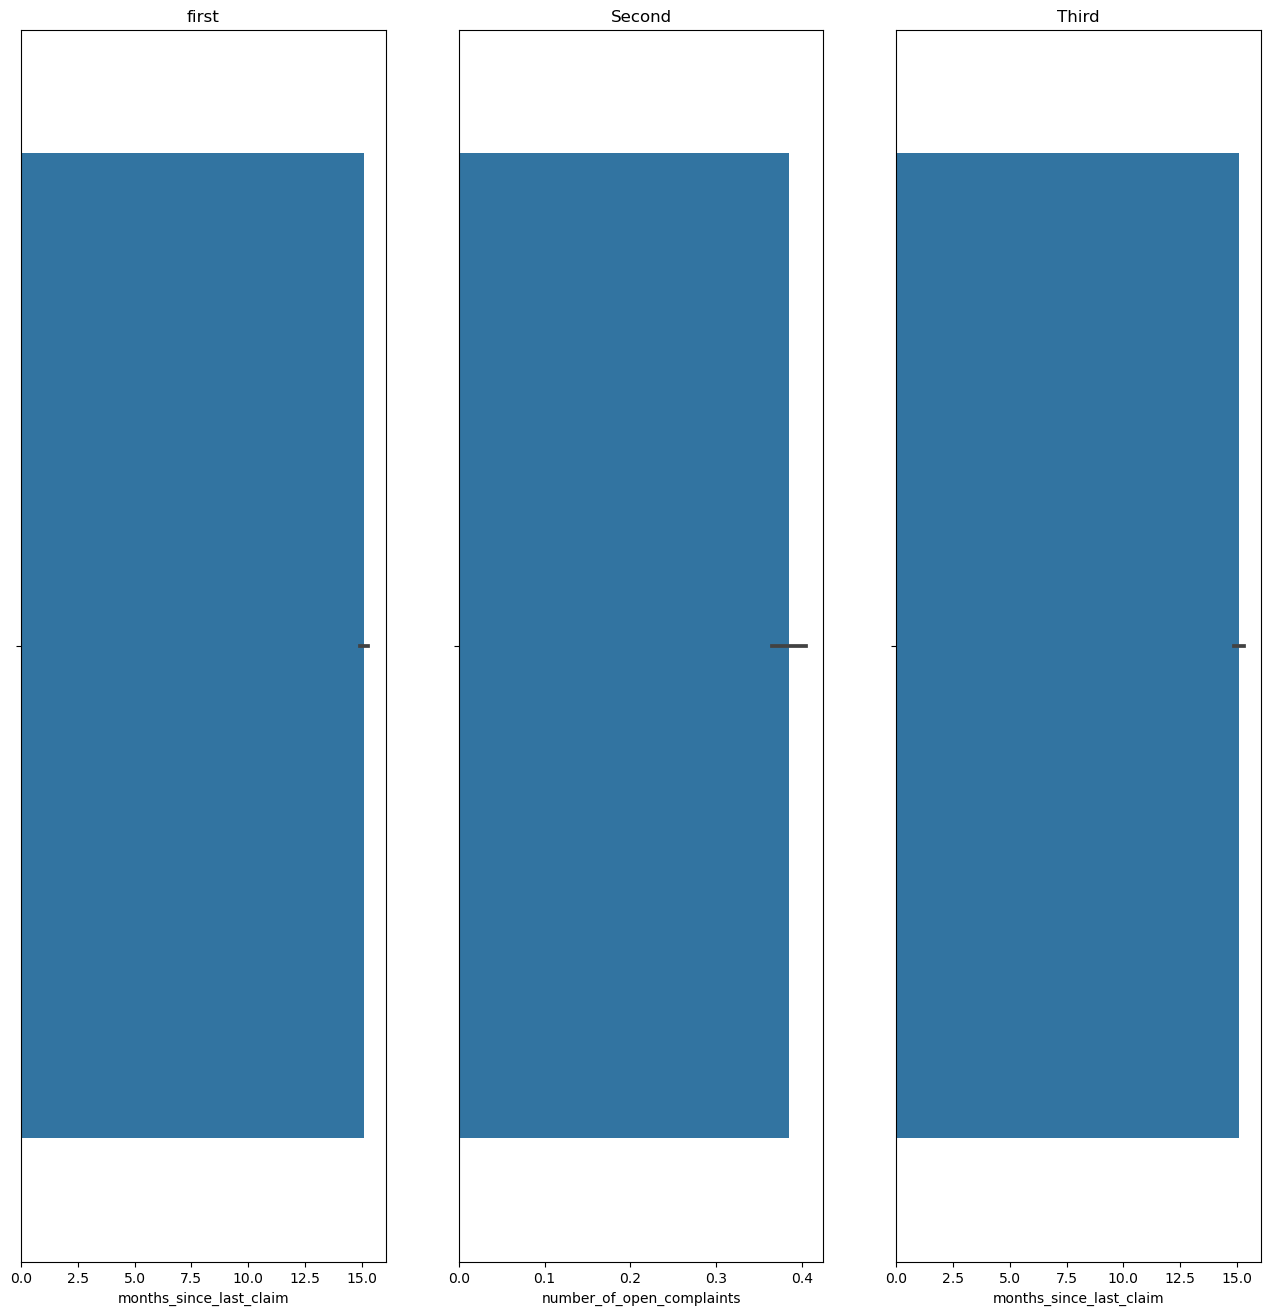

In [24]:
# If we fill the NA's of "Income" with the mean...we will have
fig, ax = plt.subplots(1,3, figsize=(16,16))
sns.barplot(x="months_since_last_claim", data = discrete_df, ax = ax[0]);
ax[0].set_title("first")
#ax[0].set_ylim((0,25000))
sns.barplot(x="number_of_open_complaints", data = discrete_df, ax = ax[1]);
ax[1].set_title("Second")
#ax[1].set_ylim((0,25000))
sns.barplot(x="months_since_last_claim", data = discrete_df, ax = ax[2]);
ax[2].set_title("Third")
#ax[2].set_ylim((0,25000))
plt.show()




In [25]:
import seaborn as sns

def plot_continuous_df_histograms(dataframe):
    plt.figure(figsize=(16,16))
    for i, column in enumerate(dataframe.columns):
        plt.subplot(len(dataframe.columns)//3+1, 3, i+1)
        sns.histplot(dataframe[column], kde=False)
        plt.xlabel(column)
    plt.show()


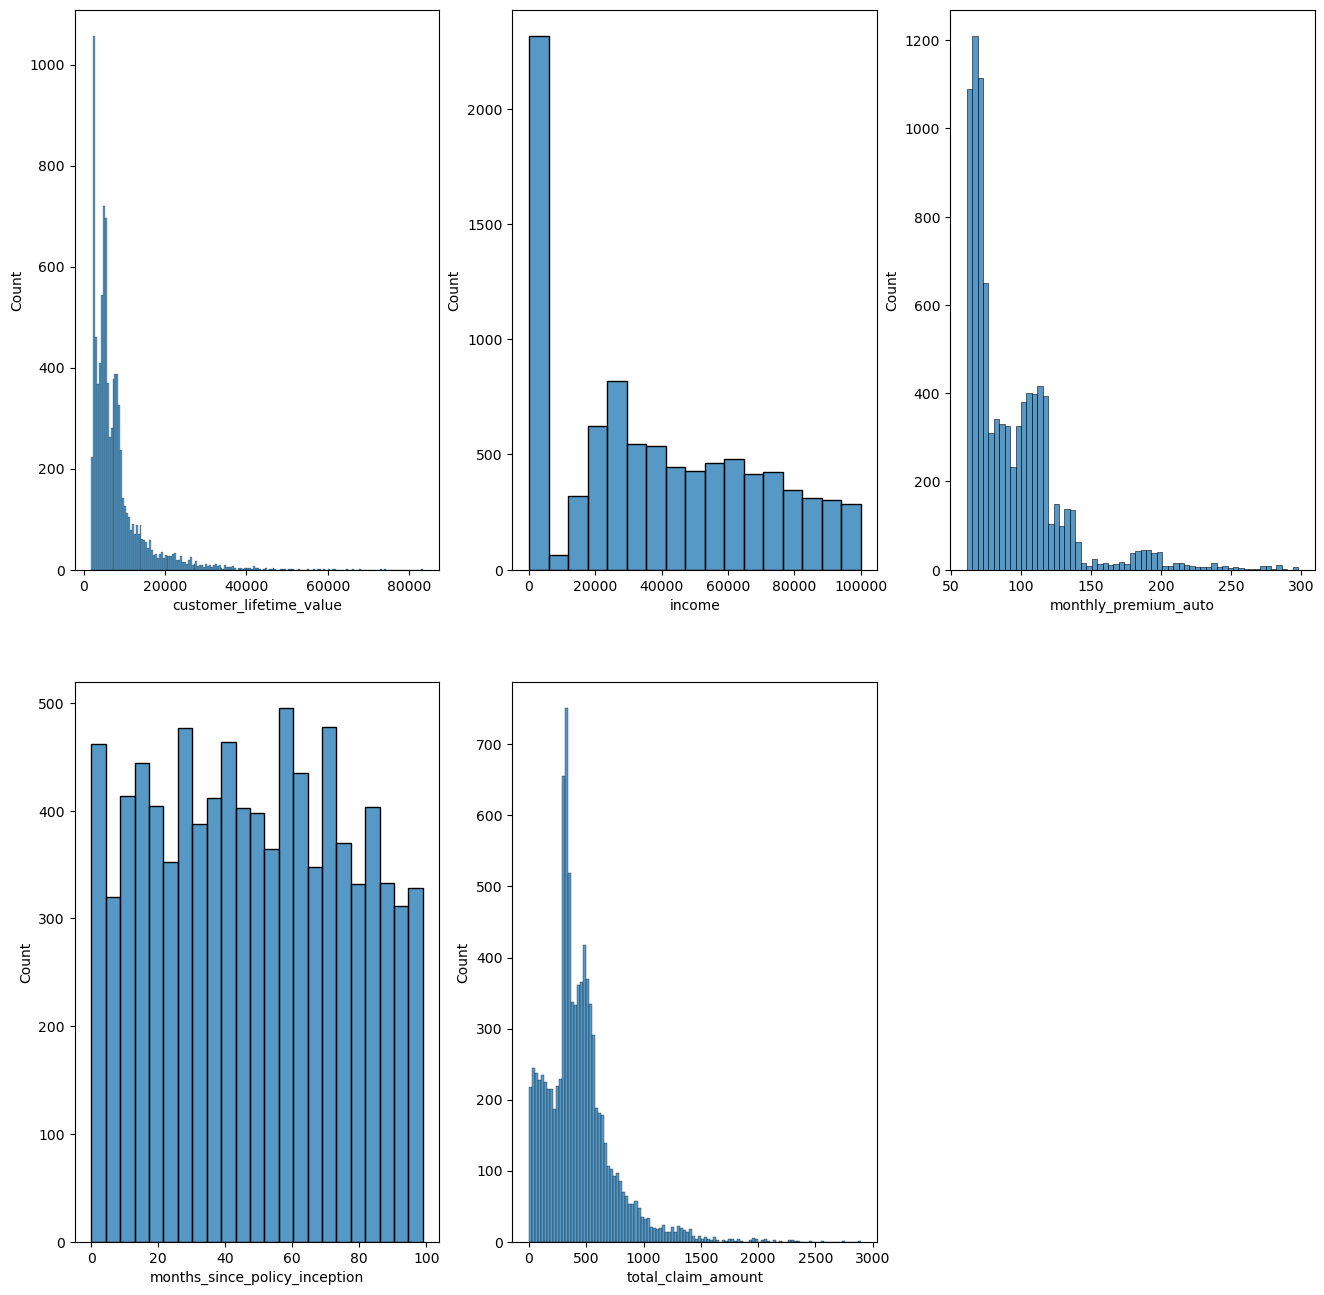

In [26]:
plot_continuous_df_histograms(continuous_df)

In [27]:
import seaborn as sns

def plot_outliers(df):
    fig, axes = plt.subplots(len(df.columns), 1, figsize=(16, 4*len(df.columns)))
    for i, col in enumerate(df.columns):
        sns.boxplot(df[col], ax=axes[i])
        axes[i].set_xlabel(col)


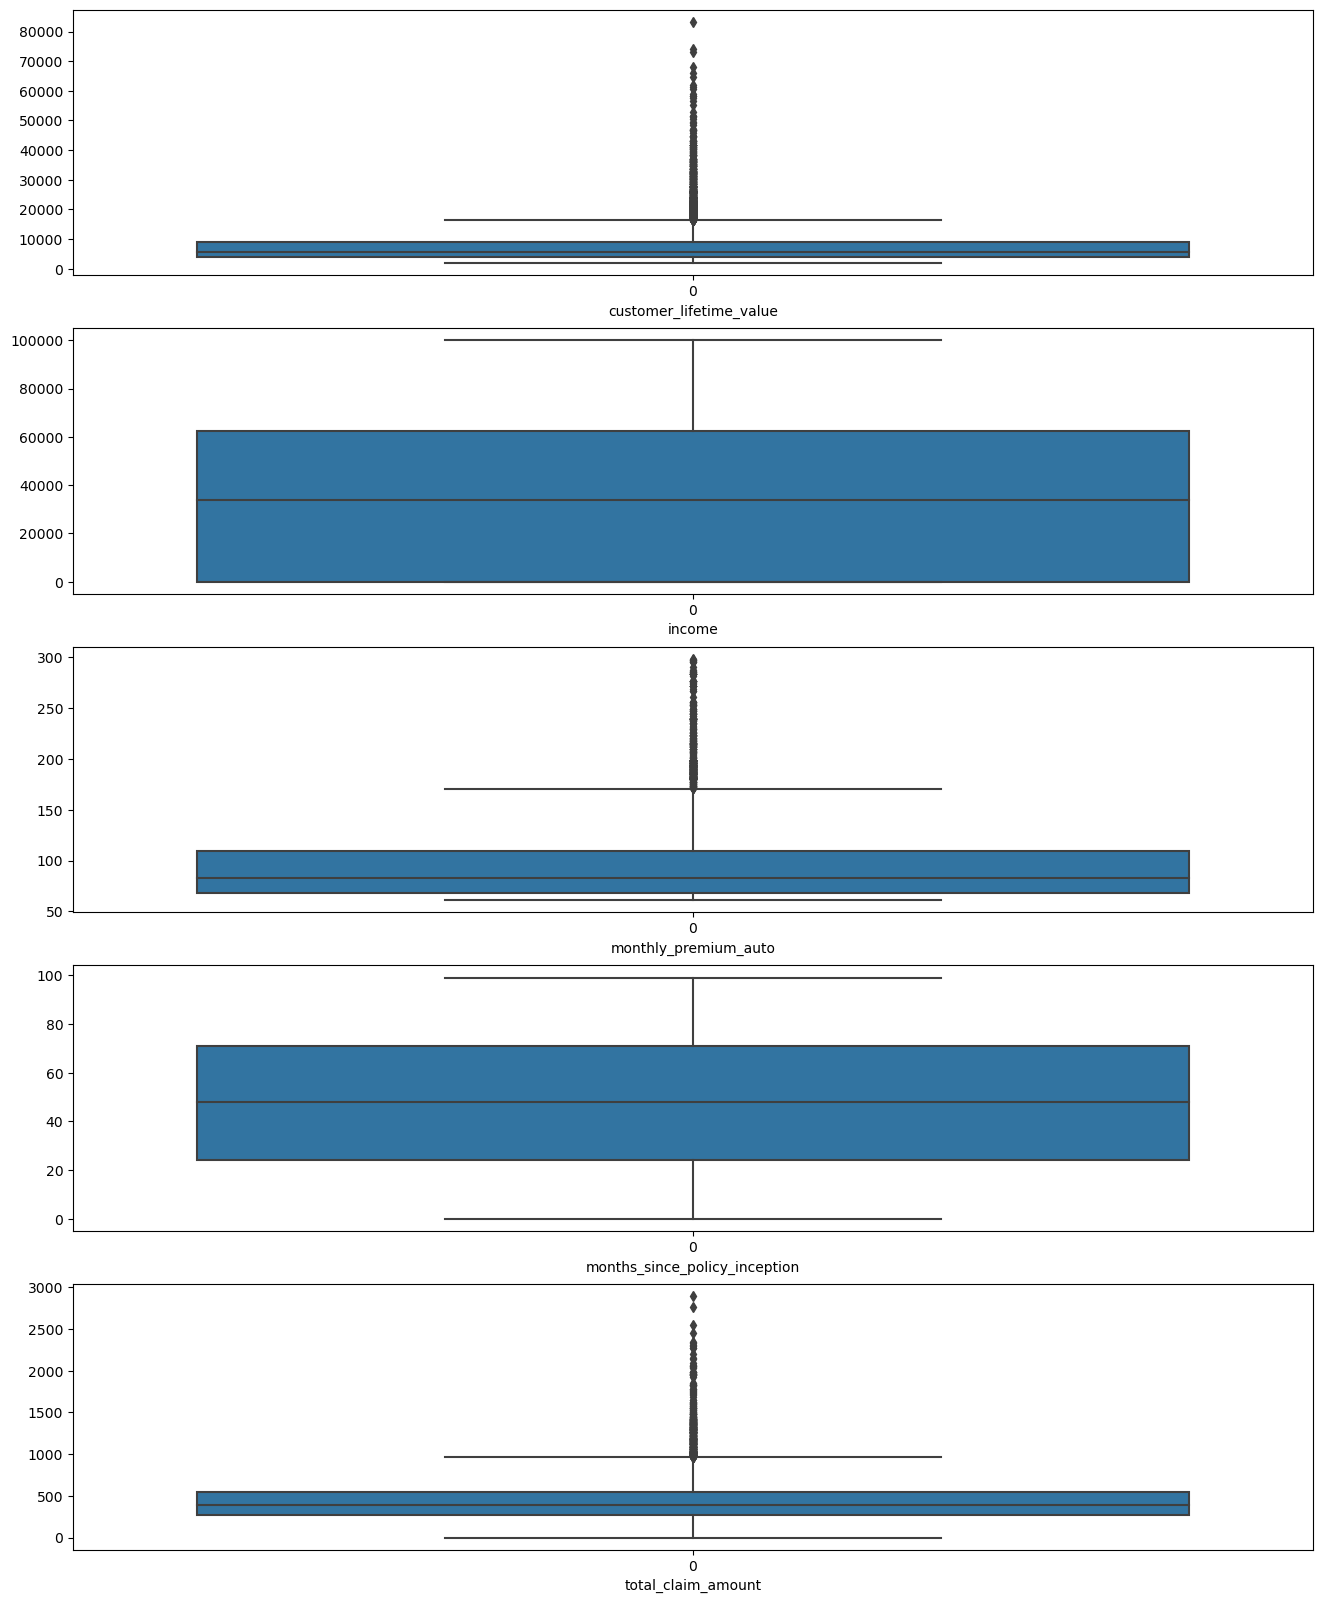

In [28]:
plot_outliers(continuous_df)

# Lab Cleaning Categorical Data

In [29]:
categorical = customer_df.select_dtypes(include=['object'])
categorical 
        

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [30]:
categorical.columns

Index(['state', 'response', 'coverage', 'education', 'employmentstatus',
       'gender', 'location_code', 'marital_status', 'policy_type', 'policy',
       'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [31]:
def plot_categorical(df):
    categorical_cols = []
    for col in df.columns:
        if df[col].dtype == 'object':
            categorical_cols.append(col)
    value_counts = {}
    for col in categorical_cols:
        value_counts[col] = df[col].value_counts()
        value_counts[col] = value_counts[col].sort_values(ascending=False)
    for col in categorical_cols:
        plt.figure(figsize=(8, 6))
        if len(value_counts[col]) >= 6:
            sns.countplot(y=col, data=df, order=value_counts[col].index)
        else:
            sns.countplot(x=col, data=df, order=value_counts[col].index)
        plt.title(f'{col} Distribution')
        plt.show()


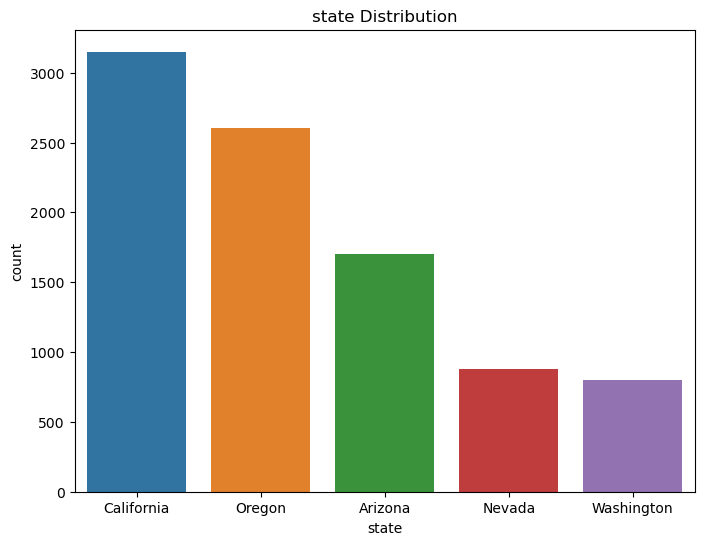

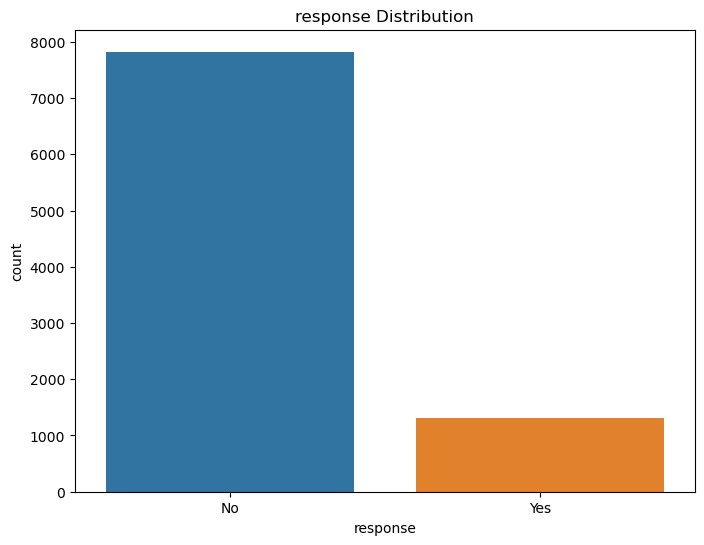

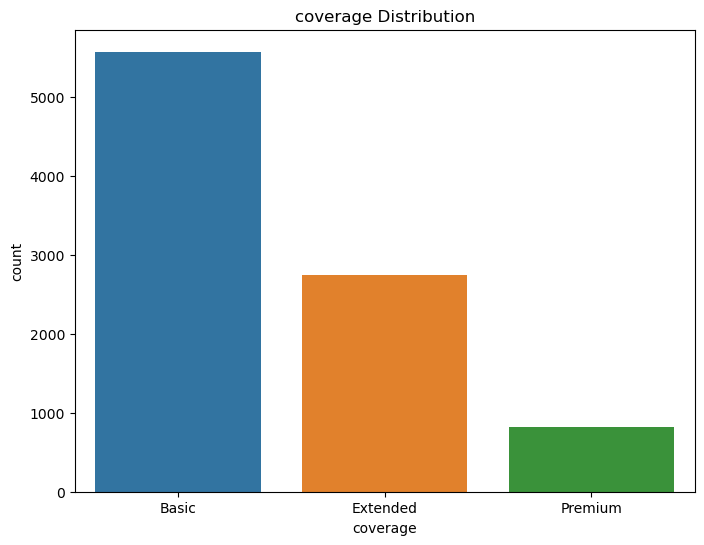

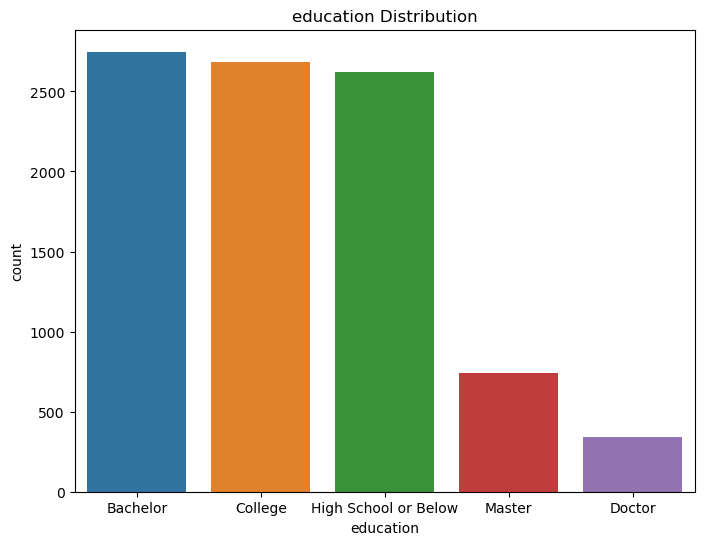

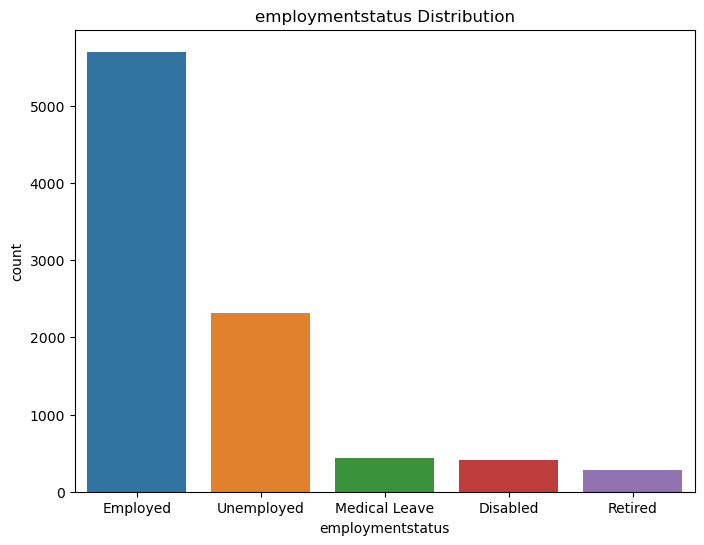

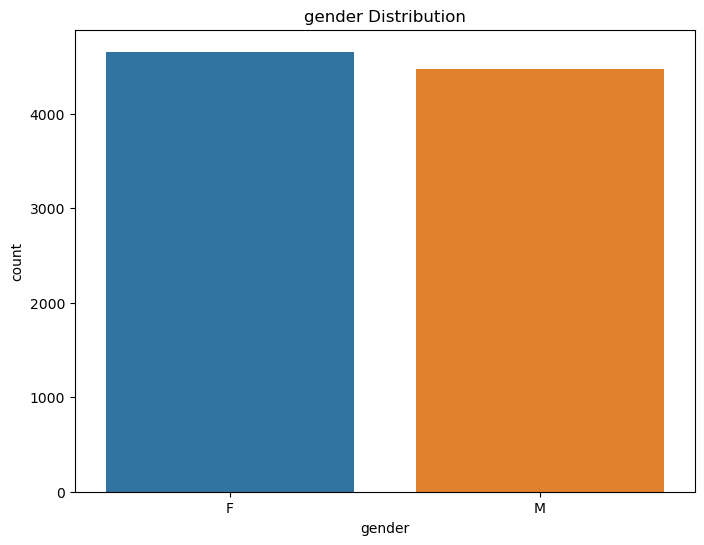

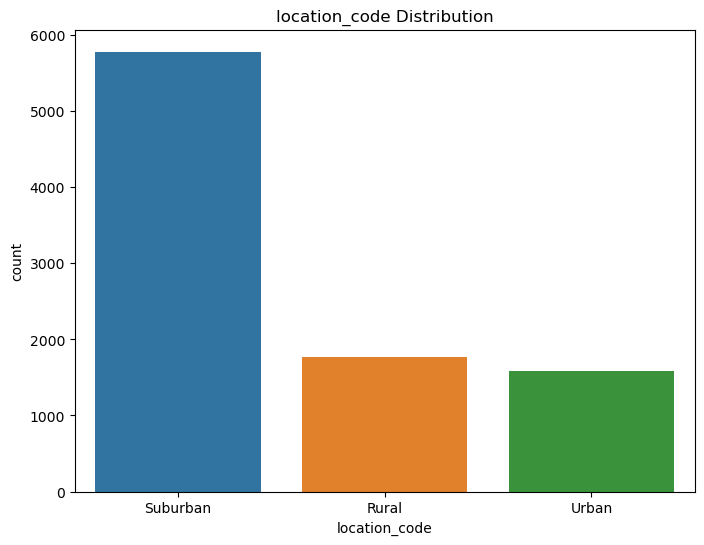

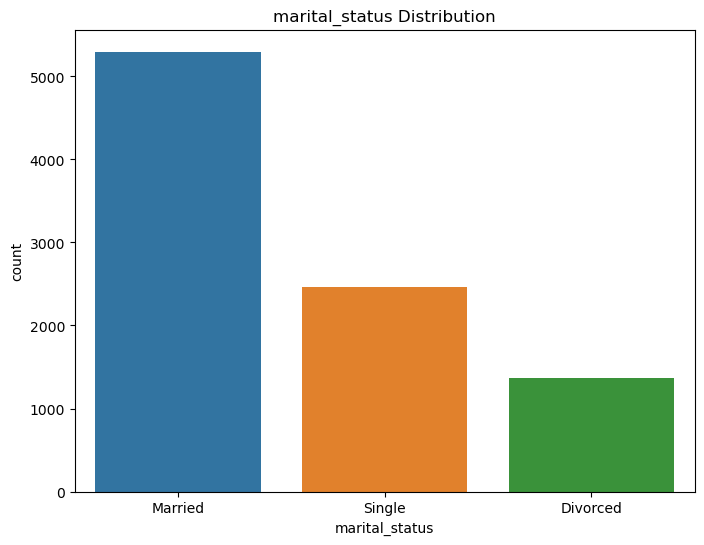

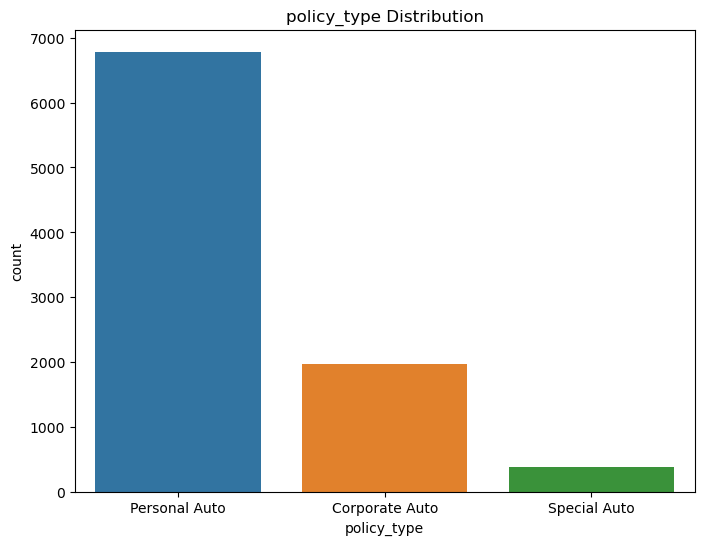

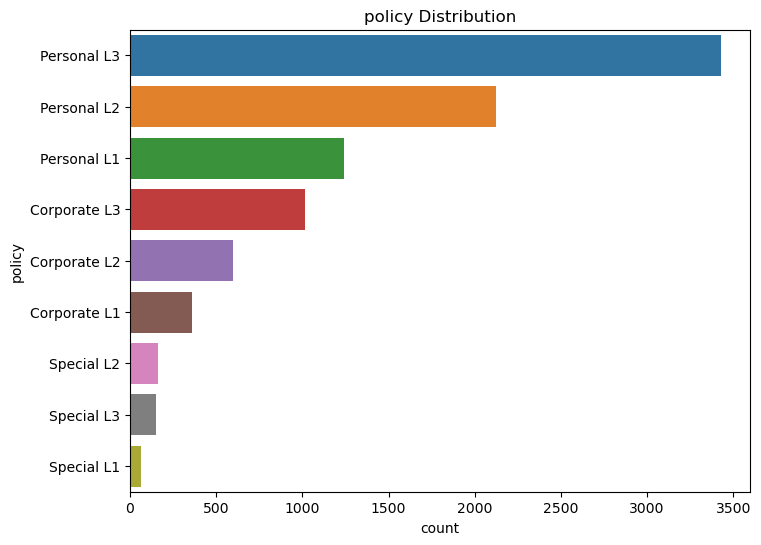

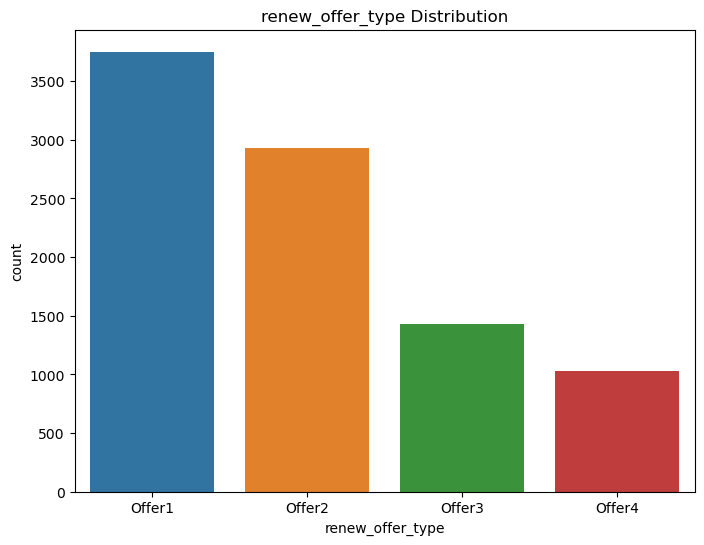

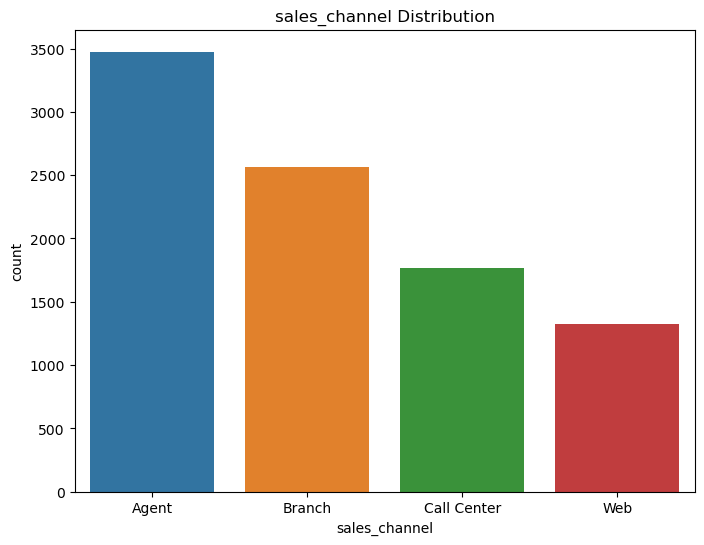

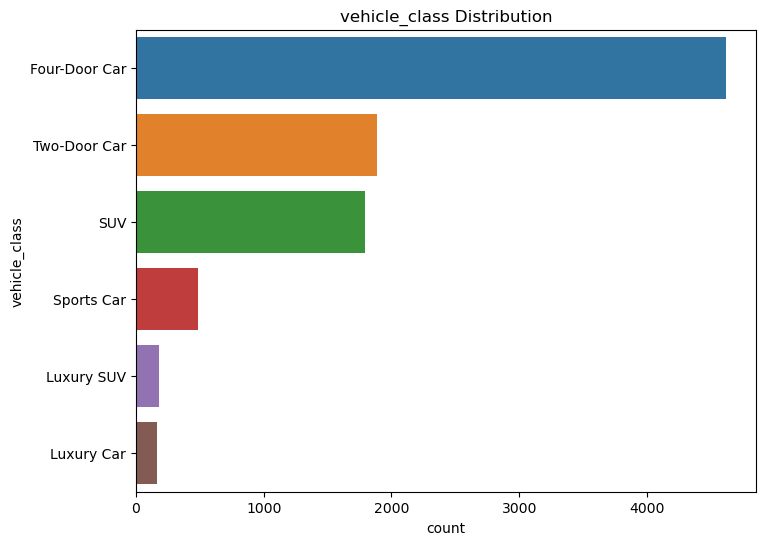

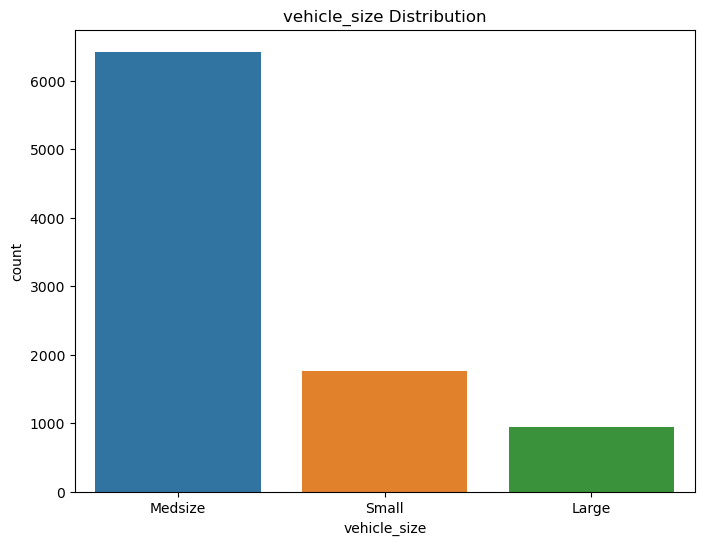

In [32]:
plot_categorical(categorical)


In [33]:
categorical = categorical.drop('policy_type', axis=1)


In [34]:
def clean_policy(df):
    df['policy'] = df['policy'].map({'Corporate L3': 'L3', 'Special L3': 'L3',
                                     'Personal L3' : 'L3', 
                                     'Corporate L2': 'L2', 'Personal L2': 'L2',
                                     'Special' : 'L2',
                                     'Corporate L1': 'L1', 'Personal L1': 'L1',
                                    'Special L1': 'L1'})
    return df


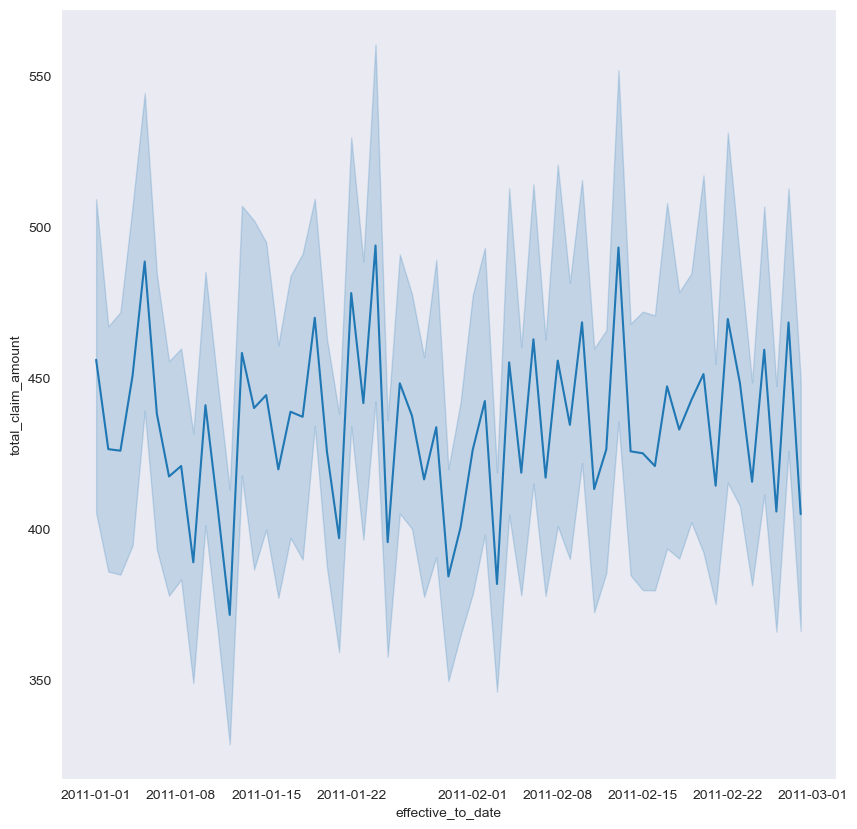

In [35]:
import seaborn as sns

sns.set_style('dark')

plt.figure(figsize=(10, 10))
sns.lineplot(x='effective_to_date', y='total_claim_amount', data=customer_df)
plt.show()

In [36]:
import pandas as pd
import datetime

# Create a new DataFrame with the required columns
date_df = pd.DataFrame(columns=['day', 'day_name', 'week', 'month', 'total_claim_amount'])

# Add the columns to the new DataFrame
date_df['day'] = customer_df['effective_to_date'].dt.day
date_df['day_name'] = customer_df['effective_to_date'].dt.day_name()
date_df['week'] = customer_df['effective_to_date'].dt.week
date_df['month'] = customer_df['effective_to_date'].dt.month_name()
date_df['total_claim_amount'] = customer_df['total_claim_amount']


/var/folders/t8/k_p89pr11hl5tqbxsmphfkyr0000gp/T/ipykernel_9125/1639790201.py:10: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  date_df['week'] = customer_df['effective_to_date'].dt.week


date_df.columns


In [37]:
target = date_df.groupby('day_name')['total_claim_amount'].sum().round(2)


In [38]:
list_of_correct_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

target = target.reindex(index=list_of_correct_days)
target

day_name
Monday       655689.71
Tuesday      502518.93
Wednesday    541563.05
Thursday     541820.80
Friday       533658.79
Saturday     608060.10
Sunday       581655.66
Name: total_claim_amount, dtype: float64

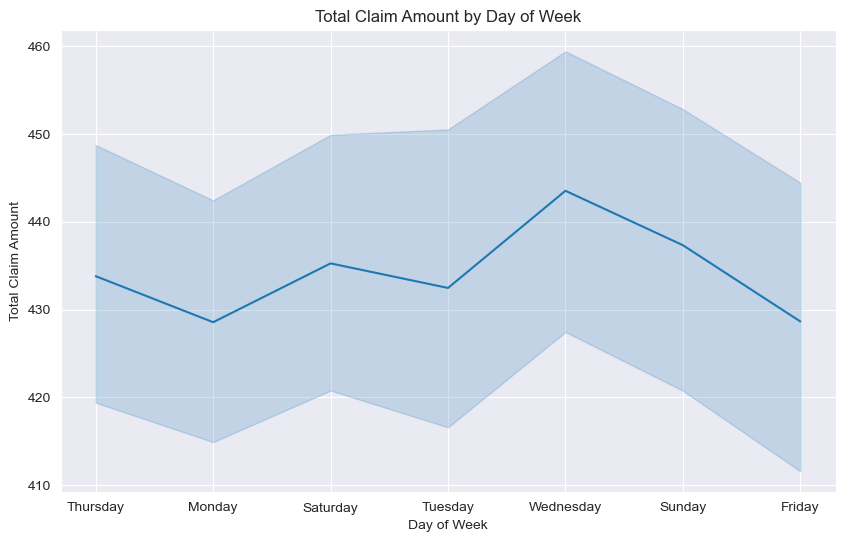

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")

plt.figure(figsize=(10, 6))
sns.lineplot(data=date_df, x="day_name", y="total_claim_amount")
plt.title("Total Claim Amount by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Total Claim Amount")
plt.show()

In [40]:
list_of_correct_values = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
claims_by_day = date_df.groupby('day_name')['total_claim_amount'].count().reindex(index=list_of_correct_values)

In [41]:
median_by_day = date_df.groupby('day_name')['total_claim_amount'].median().sort_values(ascending=False)


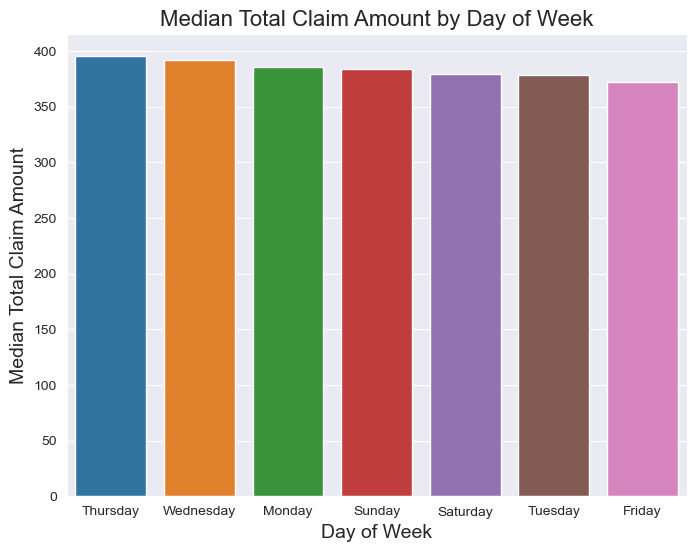

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the median target by day of the week name
median_target = date_df.groupby('day_name')['total_claim_amount'].median().sort_values(ascending=False)

# Create a bar plot using seaborn
plt.figure(figsize=(8,6))
sns.barplot(x=median_target.index, y=median_target)
plt.title('Median Total Claim Amount by Day of Week', fontsize=16)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Median Total Claim Amount', fontsize=14)
plt.show()

In [43]:
target_by_month = date_df.groupby('month')['total_claim_amount'].sum().round(2)
target_by_month = target_by_month.reindex(index=list_of_correct_values)


In [44]:
month_df = customer_df[['effective_to_date', 'total_claim_amount']].copy()
month_df['month'] = pd.to_datetime(month_df['effective_to_date']).dt.strftime('%B')
month_df = month_df[['month', 'total_claim_amount']]
month_median = month_df.groupby('month')['total_claim_amount'].agg('median').round(2)


In [45]:
correct_month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month_median = month_median.reindex(index=correct_month_order)


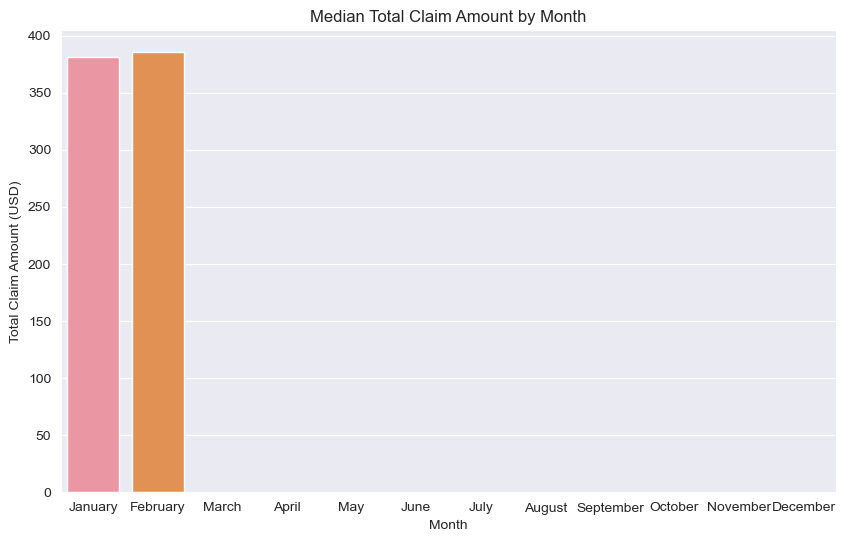

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")
plt.figure(figsize=(10,6))
sns.barplot(x=month_median.index, y=month_median.values)
plt.title("Median Total Claim Amount by Month")
plt.xlabel("Month")
plt.ylabel("Total Claim Amount (USD)")
plt.show()


In [47]:
import pandas as pd
import numpy as np

def remove_outliers(df, thr=3):
    # Loop through each column in the dataframe
    for col in df.columns:
        # Calculate the mean and standard deviation
        col_mean = df[col].mean()
        col_std = df[col].std()

        # Create a boolean mask for the outliers
        outliers_mask = np.abs(df[col] - col_mean) > thr * col_std

        # Replace the outliers with NaN values
        df.loc[outliers_mask, col] = np.nan

    # Drop rows with any NaN values and reset the index
    clean_df = df.dropna().reset_index(drop=True)

    return clean_df



In [48]:
import pandas as pd
import numpy as np

def remove_outliers(df, thr=3):
    # Loop through each column in the dataframe
    for col in df.columns:
        # Calculate the mean and standard deviation
        col_mean = df[col].mean()
        col_std = df[col].std()

        # Create a boolean mask for the outliers
        outliers_mask = np.abs(df[col] - col_mean) > thr * col_std

        # Replace the outliers with NaN values
        df.loc[outliers_mask, col] = np.nan

    # Drop rows with any NaN values and reset the index
    clean_df = df.dropna().reset_index(drop=True)

    return clean_df

# Example usage
continuous_clean_df = remove_outliers(continuous_df)

In [49]:
# concatenate the dataframes
df = pd.concat([continuous_clean_df, discrete_df, categorical, date_df['week']], axis=1)

# drop the NaN values and reset the index
df = df.dropna().reset_index(drop=True)

In [50]:
df.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_policy_inception', 'total_claim_amount',
       'months_since_last_claim', 'number_of_open_complaints',
       'number_of_policies', 'state', 'response', 'coverage', 'education',
       'employmentstatus', 'gender', 'location_code', 'marital_status',
       'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class',
       'vehicle_size', 'week'],
      dtype='object')

In [51]:
df = df.reindex(columns=['customer_lifetime_value', 'income', 'monthly_premium_auto',
                         'months_since_policy_inception', 'months_since_last_claim', 
                         'number_of_open_complaints', 'number_of_policies', 'state',
                         'response', 'coverage', 'education', 'employmentstatus', 'gender',
                         'location_code', 'marital_status', 'policy', 'renew_offer_type',
                         'sales_channel', 'vehicle_class', 'vehicle_size', 'week', 
                         'total_claim_amount'])

In [52]:
df['response'] = df['response'].replace({'Yes': 1, 'No': 0})


In [53]:
# create a dictionary to map values to new categories
education_dict = {"Master": "Graduate", "Doctor": "Graduate"}

# replace the values using the dictionary
df["education"] = df["education"].replace(education_dict)

In [54]:
df['employmentstatus'].replace(["Medical Leave", "Disabled", "Retired"], "Inactive", inplace=True)


In [55]:
print(df['gender'].unique())

['F' 'M']


In [56]:
gender_map = {"F": 0, "M": 1}
df["gender"] = df["gender"].map(gender_map)


In [57]:
# Create a dictionary to map the values
vehicle_class_mapping = {"Sports Car": "Luxury", "Luxury SUV": "Luxury", "Luxury Car": "Luxury"}

# Use the map() function to apply the dictionary to the column
df["vehicle_class"] = df["vehicle_class"].map(vehicle_class_mapping).fillna(df["vehicle_class"])


In [58]:
coverage_map = {
    'Basic': 1,
    'Extended': 2,
    'Premium': 3
}

df['coverage'] = df['coverage'].replace(coverage_map)


In [59]:
# define the encoding scheme
employmentstatus_map = {'Employed': 2, 'Inactive': 1, 'Unemployed': 0}

# apply the encoding using the map method
df['employmentstatus'] = df['employmentstatus'].map(employmentstatus_map)


In [60]:
location_mapping = {'Urban': 2, 'Suburban': 1, 'Rural': 0}
df['location_code'] = df['location_code'].map(location_mapping)


In [61]:
vehicle_size_map = {"Large": 2, "Medsize": 1, "Small": 0}
df["vehicle_size"] = df["vehicle_size"].map(vehicle_size_map)

In [62]:

# Identify the categorical nominal columns
categorical_nominal_cols = []
for col in df.columns:
    if df[col].dtype == object and df[col].nunique() < 10:
        categorical_nominal_cols.append(col)

# Create a new dataframe with the categorical nominal columns
categorical_nominal_df = df[categorical_nominal_cols]

In [63]:
# create a list of the categorical nominal columns
categorical_nominal_cols = ['state', 'response', 'education', 'employmentstatus', 'gender', 'marital_status', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class']

# create a list of named levels
levels = []

# loop through each categorical nominal column and get its unique values
for col in categorical_nominal_cols:
    unique_vals = df[col].unique()
    levels.append(list(unique_vals))

print(levels)

[['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'], [0, 1], ['Bachelor', 'College', 'Graduate', 'High School or Below'], [2, 0, 1], [0, 1], ['Married', 'Single', 'Divorced'], ['Corporate L3', 'Personal L3', 'Corporate L2', 'Personal L1', 'Special L2', 'Corporate L1', 'Personal L2', 'Special L1', 'Special L3'], ['Offer1', 'Offer3', 'Offer2', 'Offer4'], ['Agent', 'Call Center', 'Web', 'Branch'], ['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury']]


In [104]:
from sklearn.preprocessing import OneHotEncoder


encoder = OneHotEncoder(drop='first', categories=levels)




# Lab comparing regression models

In [105]:
x = df.drop('total_claim_amount', axis=1)
y = df['total_claim_amount']

In [106]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=31)

In [110]:
x_train_num,x_train_cat = get_numerical_and_categorical_columns(x_train)
x_test_num,x_test_cat = get_numerical_and_categorical_columns(x_test)


In [111]:
x_test_num.head()
x_test_cat.head()

,state,education,marital_status,policy,renew_offer_type,sales_channel,vehicle_class
8501,California,Bachelor,Married,Personal L2,Offer2,Call Center,Luxury
187,Arizona,Bachelor,Married,Personal L1,Offer2,Agent,SUV
3639,Oregon,High School or Below,Married,Personal L2,Offer4,Call Center,Four-Door Car
2507,California,College,Divorced,Personal L3,Offer3,Web,Two-Door Car
7120,California,College,Married,Personal L3,Offer2,Branch,Four-Door Car


In [112]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the encoder without specifying categories
encoder = OneHotEncoder(drop='first')

# Fit the encoder on the categorical training data
encoder.fit(x_train_cat)

# Transform the categorical training and test data
x_train_cat_enc = encoder.transform(x_train_cat).toarray()
x_test_cat_enc = encoder.transform(x_test_cat).toarray()

# Get the feature names for the one-hot encoded columns
encoded_feature_names = encoder.get_feature_names_out(input_features=x_train_cat.columns)

# Create DataFrames for the encoded data
x_train_cat_enc = pd.DataFrame(x_train_cat_enc, columns=encoded_feature_names)
x_test_cat_enc = pd.DataFrame(x_test_cat_enc, columns=encoded_feature_names)

# Display the first few rows of the encoded data
print("Encoded Training Data (x_train_cat_enc):")
print(x_train_cat_enc.head())

print("\nEncoded Test Data (x_test_cat_enc):")
print(x_test_cat_enc.head())


Encoded Training Data (x_train_cat_enc):
   state_California  state_Nevada  state_Oregon  state_Washington  \
0               0.0           0.0           1.0               0.0   
1               0.0           1.0           0.0               0.0   
2               1.0           0.0           0.0               0.0   
3               0.0           0.0           1.0               0.0   
4               0.0           0.0           0.0               0.0   

   education_College  education_Graduate  education_High School or Below  \
0                1.0                 0.0                             0.0   
1                0.0                 0.0                             1.0   
2                0.0                 0.0                             1.0   
3                0.0                 0.0                             1.0   
4                0.0                 1.0                             0.0   

   marital_status_Married  marital_status_Single  policy_Corporate L2  \
0             

In [113]:
from sklearn.preprocessing import PowerTransformer

transf = PowerTransformer()
transf.fit(x_train_num)

x_train_num_tr = transf.transform(x_train_num)
x_train_num_tr = pd.DataFrame(x_train_num_tr, columns = x_train_num.columns)

x_test_num_tr = transf.transform(x_test_num)
x_test_num_tr = pd.DataFrame(x_test_num_tr, columns = x_test_num.columns)
x_train_num_tr.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,response,coverage,employmentstatus,gender,location_code,vehicle_size,week
0,1.865510,1.052497,-0.667982,-1.191887,-0.975700,-0.51146,-1.154728,-0.414545,-0.798112,-1.528116,1.022497,0.025897,0.152724,0.524639
1,-0.103486,1.093370,-0.977917,0.389688,1.333955,-0.51146,-0.068221,-0.414545,1.133329,0.749409,1.022497,1.635243,0.152724,0.524639
2,-1.418971,0.933212,-0.977917,0.421971,-1.696103,-0.51146,-1.154728,-0.414545,1.133329,0.749409,-0.977998,-1.641347,0.152724,-1.878326
3,0.103935,-1.642693,0.286472,1.097570,-1.292613,-0.51146,0.878245,-0.414545,1.133329,-1.528116,1.022497,0.025897,0.152724,0.283372
4,-0.875178,0.331249,0.451236,1.527755,1.333955,-0.51146,-0.068221,-0.414545,1.133329,0.749409,1.022497,0.025897,2.034954,0.890709


In [114]:
x_train_new = pd.concat([x_train_num_tr, x_train_cat_enc],axis=1)
x_test_new = pd.concat([x_test_num_tr, x_test_cat_enc],axis=1)
x_train_new.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,response,coverage,employmentstatus,gender,location_code,...,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car
0,1.865510,1.052497,-0.667982,-1.191887,-0.975700,-0.51146,-1.154728,-0.414545,-0.798112,-1.528116,1.022497,0.025897,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.103486,1.093370,-0.977917,0.389688,1.333955,-0.51146,-0.068221,-0.414545,1.133329,0.749409,1.022497,1.635243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.418971,0.933212,-0.977917,0.421971,-1.696103,-0.51146,-1.154728,-0.414545,1.133329,0.749409,-0.977998,-1.641347,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.103935,-1.642693,0.286472,1.097570,-1.292613,-0.51146,0.878245,-0.414545,1.133329,-1.528116,1.022497,0.025897,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-0.875178,0.331249,0.451236,1.527755,1.333955,-0.51146,-0.068221,-0.414545,1.133329,0.749409,1.022497,0.025897,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [115]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(x_train_new)

x_train_new_scaled_df = mms.transform(x_train_new)
x_train_new_scaled_df = pd.DataFrame(x_train_new_scaled_df, columns=x_train_new.columns)

x_test_new_scaled_df = mms.transform(x_test_new)
x_test_new_scaled_df = pd.DataFrame(x_test_new_scaled_df, columns=x_test_new.columns)

In [116]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression().fit(x_train_new_scaled_df, y_train)

y_train_pred = lm.predict(x_train_new_scaled_df)
y_test_pred = lm.predict(x_test_new_scaled_df)

In [117]:
def return_errors(y_pred,y):
    from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
    from math import sqrt
    
    if isinstance(y_pred, pd.DataFrame) == False:
        y_pred = pd.DataFrame(data=y_pred, columns=['value'])
    
    data = pd.DataFrame(columns=['MAE','MSE','RMSE','MAPE','R2']).T
    
    for i in y_pred:
        mae = mean_absolute_error(y_pred[i], y).round(2)
        mse = mean_squared_error(y_pred[i], y) .round(2)
        rmse = round(sqrt(mean_squared_error(y_pred[i], y)),2)
        mape = mean_absolute_percentage_error(y_pred[i],y).round(2)
        r2 = r2_score(y_pred[i], y).round(2)
        data[i]=[mae, mse, rmse, mape, r2]
    
    return data#.T.reset_index().rename(columns = {'index':'error_metric',0:'value'})

In [118]:
return_errors(y_train_pred,y_train)


,value
MAE,138.59
MSE,33385.61
RMSE,182.72
MAPE,0.37
R2,-0.54


In [119]:
return_errors(y_test_pred,y_test)


,value
MAE,138.19
MSE,32975.29
RMSE,181.59
MAPE,0.37
R2,-0.55


In [127]:
def test_models(list_models,x_train,y_train):
    print('please import necessary libraries')
    
    import re
    
    y_pred=[]
    models=[]
    
    for i in list_models:
        im = i+'()'
        model = eval(im)
        data = model.fit(x_train, y_train)
        y_pred.append(list(data.predict(x_train)))
        models.append(re.sub('[^A-Z]', '', i))
        
    y_pred = pd.DataFrame(y_pred,index=models).T
        
    return y_pred

In [128]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
list_models = ['LinearRegression','KNeighborsRegressor','MLPRegressor']
y_train_pred = test_models(list_models,x_train_new_scaled_df, y_train)

please import necessary libraries


/Users/faryal/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [129]:
y_test_pred = test_models(list_models,x_test_new_scaled_df, y_test)


please import necessary libraries


/Users/faryal/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [132]:
return_errors(y_train_pred,y_train)


,LR,KNR,MLPR
MAE,138.59,147.39,140.22
MSE,33385.61,36892.51,34104.43
RMSE,182.72,192.07,184.67
MAPE,0.37,0.39,0.38
R2,-0.54,-1.69,-0.54


In [131]:
return_errors(y_test_pred,y_test)


,LR,KNR,MLPR
MAE,137.11,146.30,156.03
MSE,32273.92,35041.31,42686.10
RMSE,179.65,187.19,206.61
MAPE,0.37,0.40,0.40
R2,-0.60,-1.82,-7.37
